In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Utilities for plotting
import sys
sys.path.append("../")
from utils.plotting import plot_stt, plot_isochrones

In [2]:
event_num = 2
input_dir = f"/home/nikin105/mlProject/data/machineLearning/mum5mup5/evaluation/mum5mup5/layerwise/{event_num}"
input_dir2 = f"/home/nikin105/mlProject/data/machineLearning/mum5mup5/classification/layerwise/test/{event_num}"
data = torch.load(input_dir,map_location=torch.device('cpu'))
data2 = torch.load(input_dir2,map_location=torch.device('cpu'))

mydata = {
    "hid" : data2.hid.detach().numpy(),
    "r" : data2.x.detach().numpy()[:,0],
    "phi" : data2.x.detach().numpy()[:,1],
    "isochrone" : data2.x.detach().numpy()[:,2],
    "pid": data2.pid.detach().numpy(),
}

df = pd.DataFrame(mydata)

data = pd.concat([data,df],axis=1).drop(columns=['hid'])
data

,hit_id,track_id,r,phi,isochrone,pid
0,0,0,0.425446,0.893210,0.777485,9
1,1,0,0.440800,0.886407,0.625807,9
2,2,0,0.464437,0.887965,0.024470,9
3,3,0,0.488113,0.889371,0.661076,9
4,4,0,0.503854,0.883536,0.675684,9
...,...,...,...,...,...,...
146,146,13,0.940935,0.680922,0.380234,2
147,147,13,0.962806,0.682594,0.918363,2
148,148,14,0.544667,0.768297,0.883943,1
149,149,14,0.568562,0.767524,0.466195,1


In [5]:
# Convert hit positions from scaled polar coordinates to cartesian coordinates
r = data.r * 42
phi = data.phi * 2 * np.pi
isochrones = data.isochrone * 0.5

x = r * np.cos(phi)
y = r * np.sin(phi)

# Get the number of hits
n_hits = len(data)

# Prepare the colors for the different pids
pid_color_palette = sns.color_palette("tab20")

# Rename some variables for better readability
pids = data.pid
track_ids = data.track_id

# Get the unique particle ids

unique_pids = np.unique(pids)
unique_track_ids = data.track_id.unique()

Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/clustering//tracks_2.png
Saving figure to /home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/mum5mup5/layerwise_v2/clustering//tracks_2.pdf


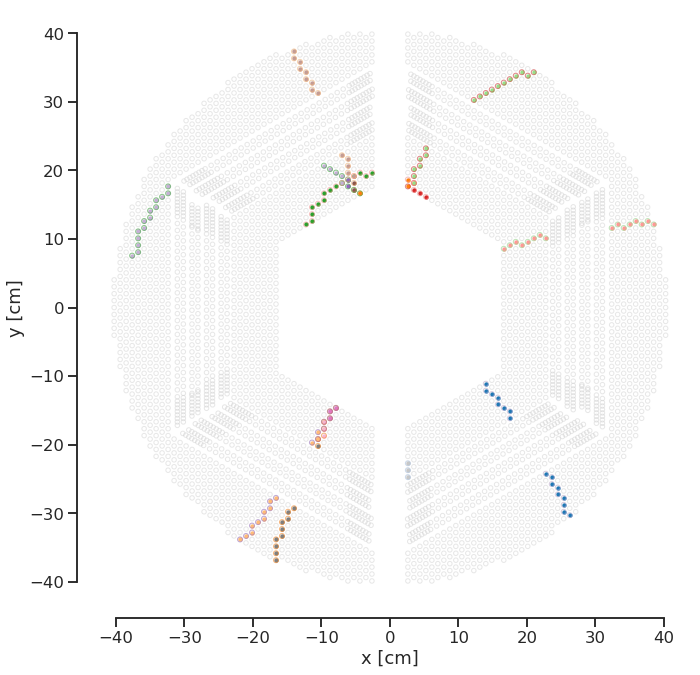

In [6]:
save_figs = True
channel = "mum5mup5"
project_name = "layerwise_v2"
image_dir = f"/home/nikin105/sciebo/Doktor/ML-Project/Images/machineLearning/{channel}/{project_name}/clustering/"

fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

track_i = 0
for track_id in unique_track_ids:
    ax.scatter(
        x[track_ids == track_id],
        y[track_ids == track_id],
        color=pid_color_palette[track_i],
        s=19,
        linewidth=0,
    )
    track_i += 1

for pid in unique_pids:
    ax.scatter(
        x[pids == pid],
        y[pids == pid],
        ec=pid_color_palette[pid],
        fc="none",
        s=25,
        linewidth=1,
        alpha=0.5,
    )

fig.tight_layout()

if save_figs:
    print(f"Saving figure to {image_dir}/tracks_{event_num}.png")
    plt.savefig(f"{image_dir}/tracks_{event_num}.png", dpi=300)
    print(f"Saving figure to {image_dir}/tracks_{event_num}.pdf")
    plt.savefig(f"{image_dir}/tracks_{event_num}.pdf", dpi=300)
else:
    plt.show()